In [253]:
# Modules
import inspect
import numpy as np
import pandas as pd
import seaborn as sns
import inspect
import warnings

from sklearn import ensemble, metrics, model_selection, preprocessing, tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error, median_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot
from tensorflow.keras import callbacks, initializers, layers, losses, models, optimizers
from sklearn import datasets, metrics, model_selection, preprocessing
from tensorflow import keras
from tensorflow.keras import losses, optimizers, metrics
from sklearn.metrics import roc_curve
from sklearn import linear_model, metrics, model_selection, preprocessing
from tensorflow.keras import datasets, layers, losses, models, optimizers, regularizers
from matplotlib import pyplot


# Suppress all warnings
warnings.filterwarnings('ignore')

In [203]:
def display_roc(fp_rates:np.ndarray, tp_rates:np.ndarray, thresholds:np.ndarray, best_index:int=None) -> None:
    '''Displays ROC curve and AUC'''
    auc     = metrics.auc(fp_rates, tp_rates)
    fig, ax = pyplot.subplots(1, figsize=(5, 5))
    ax.plot(fp_rates, tp_rates, color='blue', label=f'AUC: {auc:0.4f}')
    ax.plot([0, 1], [0, 1], color='red', linestyle='dashed')
    if best_index is not None:
        ax.scatter(fp_rates[best_index], tp_rates[best_index], marker='o', c='lightgreen', s=7.5**2, edgecolor='black', zorder=2, label=f'Threshold: {thresholds[best_index]:0.4f}')
    ax.set_title('Receiver operating characteristic')
    ax.set_xlabel('False positive rate')
    ax.set_ylabel('True positive rate')
    ax.legend(loc='lower right', frameon=False)
    pyplot.tight_layout()
    pyplot.show()

def display_history(history:dict, stat:str='loss', validation:bool=False) -> None:
    '''Displays training history for a statistic'''
    fig, ax = pyplot.subplots(1, figsize=(5, 5))
    ax.plot(history[stat], label='Training sample')
    if validation:
        ax.plot(history[f'val_{stat}'], label='Validation sample')
    ax.set_title(f'Model training', fontsize=15)
    ax.set_ylabel(stat.title())
    ax.set_xlabel('Epoch')
    ax.legend(frameon=False)
    pyplot.tight_layout()
    pyplot.show()
    
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    
    f1 = 2 * ((precision * recall) / (precision + recall + K.epsilon()))
    return f1

In [115]:
# Import the data
df_selected = pd.read_csv('Data_selection.csv')
df_no_selection = pd.read_csv('Data_no_selection.csv')

# Preparing data for fitting Feed Forward Neural Network

In [116]:
df = df_selected

# Randomly split the data set into training and testing and deal with the imbalanced dependent variable using SMOTE
y = df['TARGET']
X = df.drop('TARGET', axis=1)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y.values.astype(float), train_size = 0.75, shuffle = True, random_state = 480)


In [117]:
X_train

,ORGANIZATION_TYPE_Business Entity Type 2,DAYS_REGISTRATION,application_train_flag_OBS_30_CNT_SOCIAL_CIRCLE,"DAYS_EMPLOYED_(-144.0, 365243.0]",application_train_flag_AMT_DRAWINGS_CURRENT,REGION_RATING_CLIENT_1,FLAG_CONT_MOBILE,REG_REGION_NOT_WORK_REGION,"AMT_CREDIT_SUM_LIMIT_(20.16, 23563.475]",application_train_AMT_CREDIT_SUM,...,"AMT_CREDIT_SUM_(142204.5, 315000.0]","DAYS_EMPLOYED_(-458.0, -144.0]","DAYS_EMPLOYED_(-1695.0, -1213.0]",FLAG_OWN_CAR_N,"DAYS_EMPLOYED_(-822.0, -458.0]","AMT_CREDIT_SUM_(4226032.71, 1017957917.0]","AMT_CREDIT_SUM_DEBT_(36405.0, 133663.5]",FLAG_OWN_REALTY_N,application_train_flag_SK_DPD,"AMT_INCOME_TOTAL_(99000.0, 112500.0]"
185855,0,0.901021,0,0,1,0,-0.784397,-1.006504e+00,0,0,...,0,0,0,0,0,0,1,1,0,0
172900,0,0.910060,0,0,0,0,0.460731,-1.065358e-01,0,0,...,0,0,0,0,0,1,0,1,0,0
208760,0,0.637686,0,0,1,0,-1.762375,1.400000e-11,1,1,...,0,0,0,0,1,0,0,0,0,0
185930,0,0.942445,0,0,0,0,-0.294334,6.734370e-01,0,0,...,0,0,0,0,1,0,0,0,0,0
203105,0,0.686325,0,1,1,0,1.152821,-1.006504e+00,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148543,0,0.835968,0,1,0,0,0.312855,3.934468e-01,1,0,...,0,0,0,1,0,0,0,1,0,0
4490,0,0.814405,0,0,1,0,-0.006671,4.345898e-02,0,0,...,0,0,0,0,1,0,0,1,0,0
235740,0,0.813716,0,0,1,0,0.188403,-1.006504e+00,0,0,...,0,0,0,1,0,0,0,0,0,0
132290,0,0.682069,0,0,1,0,1.370690,-1.006504e+00,0,0,...,0,0,1,1,0,0,0,0,0,0


In [120]:
undersampler = RandomUnderSampler(random_state=480)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)
X_test_resampled, y_test_resampled = undersampler.fit_resample(X_test, y_test)

In [121]:
X_train_resampled

,ORGANIZATION_TYPE_Business Entity Type 2,DAYS_REGISTRATION,application_train_flag_OBS_30_CNT_SOCIAL_CIRCLE,"DAYS_EMPLOYED_(-144.0, 365243.0]",application_train_flag_AMT_DRAWINGS_CURRENT,REGION_RATING_CLIENT_1,FLAG_CONT_MOBILE,REG_REGION_NOT_WORK_REGION,"AMT_CREDIT_SUM_LIMIT_(20.16, 23563.475]",application_train_AMT_CREDIT_SUM,...,"AMT_CREDIT_SUM_(142204.5, 315000.0]","DAYS_EMPLOYED_(-458.0, -144.0]","DAYS_EMPLOYED_(-1695.0, -1213.0]",FLAG_OWN_CAR_N,"DAYS_EMPLOYED_(-822.0, -458.0]","AMT_CREDIT_SUM_(4226032.71, 1017957917.0]","AMT_CREDIT_SUM_DEBT_(36405.0, 133663.5]",FLAG_OWN_REALTY_N,application_train_flag_SK_DPD,"AMT_INCOME_TOTAL_(99000.0, 112500.0]"
0,0,0.742785,0,0,1,0,0.408122,-3.730743e-02,0,0,...,0,0,0,1,0,0,0,1,0,0
1,0,0.813554,0,0,1,0,0.857338,-1.665337e-01,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0.981923,0,1,1,0,0.849650,1.093422e+00,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0,0.622933,0,0,1,0,0.581937,1.093422e+00,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0.396198,0,1,1,0,0.107110,1.400000e-11,1,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37199,0,0.983828,0,0,0,0,-0.438718,5.684407e-01,1,0,...,0,0,0,1,0,0,0,0,0,0
37200,1,0.794261,0,0,1,0,-0.405003,7.934329e-01,0,0,...,0,1,0,0,0,0,0,1,0,0
37201,0,0.734720,0,0,1,0,-0.730836,-1.006504e+00,0,0,...,0,0,0,1,0,0,0,0,0,1
37202,0,0.792437,0,0,1,0,-0.847017,1.934538e-01,0,0,...,0,0,0,1,0,0,0,0,0,0


In [38]:
# Standardisation

#scaler  = preprocessing.StandardScaler()
#X_train_resampled = scaler.fit_transform(X_train_resampled)
#X_test_resampled  = scaler.transform(X_test_resampled)

# Model Structure

In [137]:
# Models structure
def build_model(input_shape:int):
  initializer = initializers.HeNormal(seed=0)
  inputs  = layers.Input(shape=(input_shape,), name='input_layer')
  hidden  = layers.Dense(units=32, activation='relu',    kernel_initializer=initializer, name='hidden_layer1')(inputs)
  hidden  = layers.Dense(units=32, activation='relu',    kernel_initializer=initializer, name='hidden_layer2')(hidden)
  outputs = layers.Dense(units=1,  activation='sigmoid', kernel_initializer=initializer, name='output_layer')(hidden)
  model   = models.Model(inputs=inputs, outputs=outputs, name='simple_model')
  return model

# Builds model
model = build_model(input_shape=60)
model.summary()

Model: "simple_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 60)]              0         
                                                                 
 hidden_layer1 (Dense)       (None, 32)                1952      
                                                                 
 hidden_layer2 (Dense)       (None, 32)                1056      
                                                                 
 output_layer (Dense)        (None, 1)                 33        
                                                                 
Total params: 3,041
Trainable params: 3,041
Non-trainable params: 0
_________________________________________________________________


# Initial Model - W/O Callback

In [150]:
# Compiles model

model.compile(
    loss=losses.BinaryCrossentropy(),
    optimizer=optimizers.Adam(learning_rate=0.001), 
    metrics=[
        metrics.BinaryAccuracy(),
        metrics.Precision(),
        metrics.Recall(),
        metrics.AUC(), 
    ]
)

# Estimates model
train_params = dict(epochs=100, verbose=1)
training     = model.fit(X_train_resampled, y_train_resampled, **train_params)

Epoch 1/100
1163/1163 [==============================] - 3s 2ms/step - loss: 0.6352 - binary_accuracy: 0.6403 - precision_3: 0.6364 - recall_3: 0.6547 - auc_4: 0.6924
Epoch 2/100
1163/1163 [==============================] - 2s 2ms/step - loss: 0.6193 - binary_accuracy: 0.6563 - precision_3: 0.6535 - recall_3: 0.6651 - auc_4: 0.7153
Epoch 3/100
1163/1163 [==============================] - 2s 2ms/step - loss: 0.6172 - binary_accuracy: 0.6592 - precision_3: 0.6568 - recall_3: 0.6670 - auc_4: 0.7183
Epoch 4/100
1163/1163 [==============================] - 2s 2ms/step - loss: 0.6156 - binary_accuracy: 0.6589 - precision_3: 0.6564 - recall_3: 0.6665 - auc_4: 0.7202
Epoch 5/100
1163/1163 [==============================] - 2s 2ms/step - loss: 0.6132 - binary_accuracy: 0.6630 - precision_3: 0.6605 - recall_3: 0.6708 - auc_4: 0.7233
Epoch 6/100
1163/1163 [==============================] - 2s 2ms/step - loss: 0.6113 - binary_accuracy: 0.6643 - precision_3: 0.6622 - recall_3: 0.6706 - auc_4: 0.725

1163/1163 [==============================] - 2s 2ms/step - loss: 0.5660 - binary_accuracy: 0.7001 - precision_3: 0.7012 - recall_3: 0.6973 - auc_4: 0.7747
Epoch 50/100
1163/1163 [==============================] - 2s 2ms/step - loss: 0.5656 - binary_accuracy: 0.7007 - precision_3: 0.7016 - recall_3: 0.6987 - auc_4: 0.7748
Epoch 51/100
1163/1163 [==============================] - 2s 2ms/step - loss: 0.5647 - binary_accuracy: 0.7016 - precision_3: 0.7030 - recall_3: 0.6982 - auc_4: 0.7758
Epoch 52/100
1163/1163 [==============================] - 2s 2ms/step - loss: 0.5640 - binary_accuracy: 0.7024 - precision_3: 0.7043 - recall_3: 0.6979 - auc_4: 0.7766
Epoch 53/100
1163/1163 [==============================] - 2s 1ms/step - loss: 0.5643 - binary_accuracy: 0.7019 - precision_3: 0.7026 - recall_3: 0.7001 - auc_4: 0.7765
Epoch 54/100
1163/1163 [==============================] - 2s 1ms/step - loss: 0.5634 - binary_accuracy: 0.7023 - precision_3: 0.7029 - recall_3: 0.7007 - auc_4: 0.7770
Epoch

1163/1163 [==============================] - 2s 1ms/step - loss: 0.5493 - binary_accuracy: 0.7138 - precision_3: 0.7169 - recall_3: 0.7065 - auc_4: 0.7908
Epoch 98/100
1163/1163 [==============================] - 2s 1ms/step - loss: 0.5486 - binary_accuracy: 0.7153 - precision_3: 0.7179 - recall_3: 0.7094 - auc_4: 0.7912
Epoch 99/100
1163/1163 [==============================] - 2s 2ms/step - loss: 0.5479 - binary_accuracy: 0.7141 - precision_3: 0.7161 - recall_3: 0.7093 - auc_4: 0.7916
Epoch 100/100
1163/1163 [==============================] - 2s 2ms/step - loss: 0.5484 - binary_accuracy: 0.7156 - precision_3: 0.7191 - recall_3: 0.7076 - auc_4: 0.7914


In [175]:
#the predictive performance on the train sample
#*train_loss, train_accuracy = model.evaluate(X_train_resampled, y_train_resampled)
a =  model.evaluate(X_train_resampled, y_train_resampled)
a = [round(x, 2) for x in a]

1163/1163 [==============================] - 2s 1ms/step - loss: 0.5387 - binary_accuracy: 0.7220 - precision_3: 0.7228 - recall_3: 0.7201 - auc_4: 0.8002


In [177]:
#the predictive performance on the test sample
#*test_loss, test_accuracy = model.evaluate(X_test_resampled, y_test_resampled)
b = model.evaluate(X_test_resampled, y_test_resampled)
b = [round(x, 2) for x in b]

389/389 [==============================] - 1s 2ms/step - loss: 0.6937 - binary_accuracy: 0.6333 - precision_3: 0.6371 - recall_3: 0.6195 - auc_4: 0.6767


# Performance Metric

In [178]:
data = {'Metric': ['Binary Accuracy', 'Precision', 'Recall','ROC AUC'],
        'Training': [a[1], a[2], a[3], a[4]],
        'Test': [b[1], b[2], b[3], b[4]]}
df = pd.DataFrame(data)
df

,Metric,Training,Test
0,Binary Accuracy,0.72,0.63
1,Precision,0.72,0.64
2,Recall,0.72,0.62
3,ROC AUC,0.80,0.68


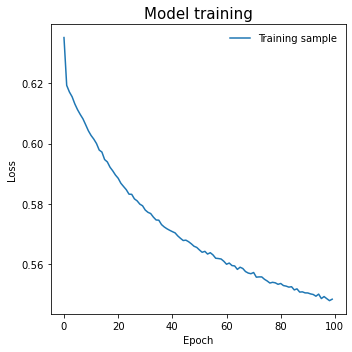

In [179]:
# Plot history
display_history(training.history)

# ROC

389/389 [==============================] - 0s 1ms/step


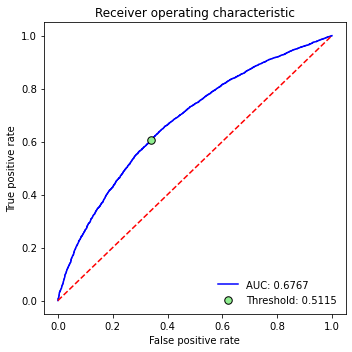

In [185]:
# ROC curve
yh_test = np.squeeze(model.predict(X_test_resampled))
fp_rates, tp_rates, thresholds = metrics.roc_curve(y_test_resampled, yh_test)
youden = np.argmax(tp_rates - fp_rates)
display_roc(fp_rates, tp_rates, thresholds, youden)

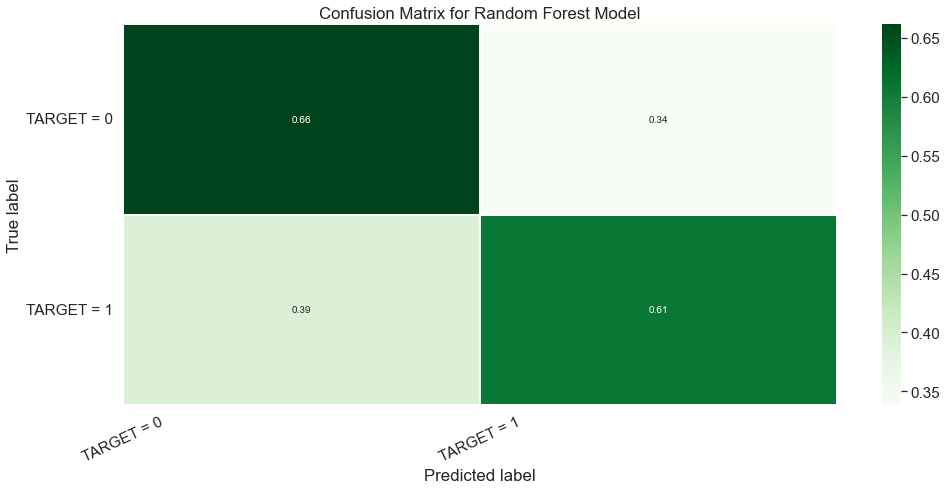

In [189]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test_resampled, yh_test > thresholds[youden])
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
pyplot.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=pyplot.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['TARGET = 0', 'TARGET = 1']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
pyplot.xticks(tick_marks, class_names, rotation=25)
pyplot.yticks(tick_marks2, class_names, rotation=0)
pyplot.xlabel('Predicted label')
pyplot.ylabel('True label')
pyplot.title('Confusion Matrix for Random Forest Model')
pyplot.show()

# Initial Model - With Callback and Validation

Epoch 1/100
872/872 [==============================] - 3s 2ms/step - loss: 0.5919 - binary_accuracy: 0.6897 - precision_4: 0.5668 - recall_4: 0.2928 - auc_5: 0.6817 - val_loss: 0.9468 - val_binary_accuracy: 0.3765 - val_precision_4: 1.0000 - val_recall_4: 0.3765 - val_auc_5: 0.0000e+00
Epoch 2/100
872/872 [==============================] - 2s 2ms/step - loss: 0.5733 - binary_accuracy: 0.7028 - precision_4: 0.5943 - recall_4: 0.3414 - auc_5: 0.7115 - val_loss: 1.0878 - val_binary_accuracy: 0.2765 - val_precision_4: 1.0000 - val_recall_4: 0.2765 - val_auc_5: 0.0000e+00
Epoch 3/100
872/872 [==============================] - 2s 2ms/step - loss: 0.5699 - binary_accuracy: 0.7048 - precision_4: 0.5992 - recall_4: 0.3459 - auc_5: 0.7163 - val_loss: 0.9238 - val_binary_accuracy: 0.3767 - val_precision_4: 1.0000 - val_recall_4: 0.3767 - val_auc_5: 0.0000e+00
Epoch 4/100
872/872 [==============================] - 2s 2ms/step - loss: 0.5676 - binary_accuracy: 0.7068 - precision_4: 0.6025 - recall_

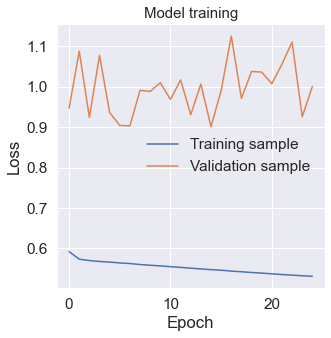

Best epoch: 14
389/389 [==============================] - 1s 1ms/step - loss: 0.6685 - binary_accuracy: 0.6177 - precision_4: 0.7137 - recall_4: 0.3931 - auc_5: 0.6999


In [193]:
# Resets model
model = build_model(input_shape=60)
model.compile(
    loss=losses.BinaryCrossentropy(),
    optimizer=optimizers.Adam(learning_rate=0.001), 
    metrics=[
        metrics.BinaryAccuracy(),
        metrics.Precision(),
        metrics.Recall(),
        metrics.AUC(), 
    ]
)

# Callbacks
train_callbacks = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
train_params.update(callbacks=train_callbacks)
del train_callbacks

# Training with validation
training = model.fit(
    X_train_resampled, y_train_resampled, 
    validation_split=0.25,
    **train_params)

# Displays history
display_history(training.history, validation=True)
print(f"Best epoch: {np.argmin(training.history['val_loss'])}")

# Generalisation performance
earlystop_stats = model.evaluate(X_test_resampled, y_test_resampled)

In [194]:
#the predictive performance on the train sample
a =  model.evaluate(X_train_resampled, y_train_resampled)
a = [round(x, 2) for x in a]

1163/1163 [==============================] - 2s 1ms/step - loss: 0.6334 - binary_accuracy: 0.6494 - precision_4: 0.7589 - recall_4: 0.4380 - auc_5: 0.7379


In [195]:
#the predictive performance on the train sample
b =  model.evaluate(X_test_resampled, y_test_resampled)
b = [round(x, 2) for x in b]

389/389 [==============================] - 1s 1ms/step - loss: 0.6685 - binary_accuracy: 0.6177 - precision_4: 0.7137 - recall_4: 0.3931 - auc_5: 0.6999


In [196]:
data = {'Metric': ['Binary Accuracy', 'Precision', 'Recall','ROC AUC'],
        'Training': [a[1], a[2], a[3], a[4]],
        'Test': [b[1], b[2], b[3], b[4]]}
df = pd.DataFrame(data)
df

,Metric,Training,Test
0,Binary Accuracy,0.65,0.62
1,Precision,0.76,0.71
2,Recall,0.44,0.39
3,ROC AUC,0.74,0.70


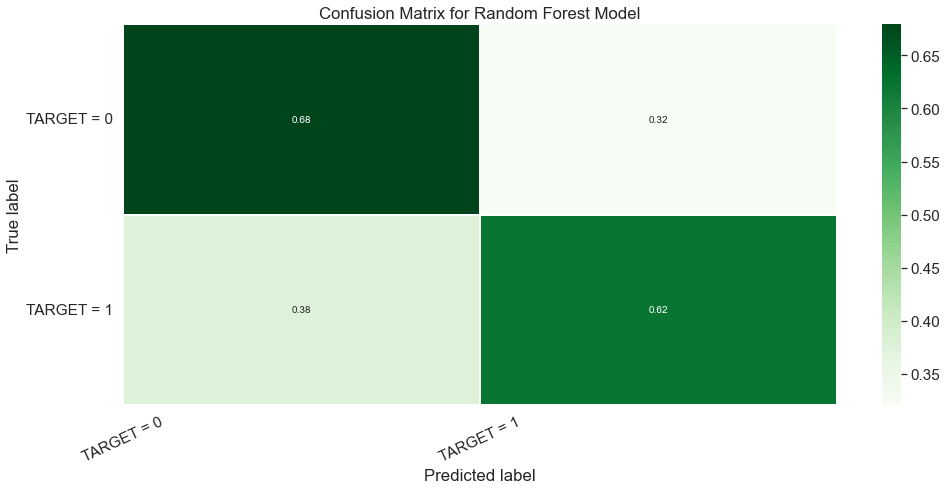

In [211]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test_resampled, yh_test > thresholds[youden])
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
pyplot.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=pyplot.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['TARGET = 0', 'TARGET = 1']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
pyplot.xticks(tick_marks, class_names, rotation=25)
pyplot.yticks(tick_marks2, class_names, rotation=0)
pyplot.xlabel('Predicted label')
pyplot.ylabel('True label')
pyplot.title('Confusion Matrix for Random Forest Model')
pyplot.show()

# Dropout Regularization

In [213]:
# Model structure
def build_model(input_shape:int):
  initializer = initializers.HeNormal(seed=0)
  inputs  = layers.Input(shape=(input_shape,), name='input_layer')
  hidden  = layers.Dense(units=32, activation='relu', kernel_initializer=initializer, name='hidden_layer1')(inputs)
  hidden  = layers.Dropout(rate=0.1, name='droupout_layer1')(hidden)
  hidden  = layers.Dense(units=32, activation='relu', kernel_initializer=initializer, name='hidden_layer2')(hidden)
  hidden  = layers.Dropout(rate=0.1, name='droupout_layer2')(hidden)
  outputs = layers.Dense(units=1,  activation='sigmoid', name='output_layer')(hidden)
  model   = models.Model(inputs=inputs, outputs=outputs, name='dropout_model')
  return model

# Re-run code in question (7)...

# Without Callback

In [214]:
# Compiles model
model = build_model(input_shape=60)
model.compile(
    loss=losses.BinaryCrossentropy(),
    optimizer=optimizers.Adam(learning_rate=0.001), 
    metrics=[
        metrics.BinaryAccuracy(),
        metrics.Precision(),
        metrics.Recall(),
        metrics.AUC(), 
    ]
)

# Estimates model
train_params = dict(epochs=100, verbose=1)
training     = model.fit(X_train_resampled, y_train_resampled, **train_params)

Epoch 1/100
1163/1163 [==============================] - 4s 2ms/step - loss: 0.6451 - binary_accuracy: 0.6297 - precision_5: 0.6324 - recall_5: 0.6197 - auc_6: 0.6764
Epoch 2/100
1163/1163 [==============================] - 2s 2ms/step - loss: 0.6259 - binary_accuracy: 0.6540 - precision_5: 0.6553 - recall_5: 0.6497 - auc_6: 0.7063
Epoch 3/100
1163/1163 [==============================] - 2s 2ms/step - loss: 0.6223 - binary_accuracy: 0.6564 - precision_5: 0.6553 - recall_5: 0.6598 - auc_6: 0.7113
Epoch 4/100
1163/1163 [==============================] - 2s 2ms/step - loss: 0.6201 - binary_accuracy: 0.6596 - precision_5: 0.6582 - recall_5: 0.6637 - auc_6: 0.7149
Epoch 5/100
1163/1163 [==============================] - 2s 2ms/step - loss: 0.6179 - binary_accuracy: 0.6600 - precision_5: 0.6578 - recall_5: 0.6670 - auc_6: 0.7179
Epoch 6/100
1163/1163 [==============================] - 2s 2ms/step - loss: 0.6163 - binary_accuracy: 0.6633 - precision_5: 0.6605 - recall_5: 0.6718 - auc_6: 0.719

1163/1163 [==============================] - 2s 2ms/step - loss: 0.5880 - binary_accuracy: 0.6875 - precision_5: 0.6873 - recall_5: 0.6878 - auc_6: 0.7543
Epoch 50/100
1163/1163 [==============================] - 2s 1ms/step - loss: 0.5884 - binary_accuracy: 0.6873 - precision_5: 0.6866 - recall_5: 0.6891 - auc_6: 0.7532
Epoch 51/100
1163/1163 [==============================] - 2s 1ms/step - loss: 0.5880 - binary_accuracy: 0.6852 - precision_5: 0.6854 - recall_5: 0.6849 - auc_6: 0.7536
Epoch 52/100
1163/1163 [==============================] - 2s 1ms/step - loss: 0.5867 - binary_accuracy: 0.6886 - precision_5: 0.6889 - recall_5: 0.6877 - auc_6: 0.7551
Epoch 53/100
1163/1163 [==============================] - 2s 1ms/step - loss: 0.5873 - binary_accuracy: 0.6870 - precision_5: 0.6861 - recall_5: 0.6894 - auc_6: 0.7548
Epoch 54/100
1163/1163 [==============================] - 2s 1ms/step - loss: 0.5874 - binary_accuracy: 0.6865 - precision_5: 0.6870 - recall_5: 0.6852 - auc_6: 0.7545
Epoch

1163/1163 [==============================] - 2s 2ms/step - loss: 0.5781 - binary_accuracy: 0.6945 - precision_5: 0.6948 - recall_5: 0.6938 - auc_6: 0.7647
Epoch 98/100
1163/1163 [==============================] - 2s 2ms/step - loss: 0.5790 - binary_accuracy: 0.6944 - precision_5: 0.6966 - recall_5: 0.6889 - auc_6: 0.7633
Epoch 99/100
1163/1163 [==============================] - 2s 2ms/step - loss: 0.5786 - binary_accuracy: 0.6945 - precision_5: 0.6953 - recall_5: 0.6926 - auc_6: 0.7642
Epoch 100/100
1163/1163 [==============================] - 2s 2ms/step - loss: 0.5776 - binary_accuracy: 0.6941 - precision_5: 0.6950 - recall_5: 0.6921 - auc_6: 0.7647


In [215]:
#the predictive performance on the train sample
a =  model.evaluate(X_train_resampled, y_train_resampled)
a = [round(x, 2) for x in a]

1163/1163 [==============================] - 2s 1ms/step - loss: 0.5592 - binary_accuracy: 0.7113 - precision_5: 0.7132 - recall_5: 0.7068 - auc_6: 0.7870


In [216]:
#the predictive performance on the train sample
b =  model.evaluate(X_test_resampled, y_test_resampled)
b = [round(x, 2) for x in b]

389/389 [==============================] - 1s 1ms/step - loss: 0.6416 - binary_accuracy: 0.6450 - precision_5: 0.6488 - recall_5: 0.6323 - auc_6: 0.6952


In [217]:
data = {'Metric': ['Binary Accuracy', 'Precision', 'Recall','ROC AUC'],
        'Training': [a[1], a[2], a[3], a[4]],
        'Test': [b[1], b[2], b[3], b[4]]}
df = pd.DataFrame(data)
df

,Metric,Training,Test
0,Binary Accuracy,0.71,0.65
1,Precision,0.71,0.65
2,Recall,0.71,0.63
3,ROC AUC,0.79,0.70


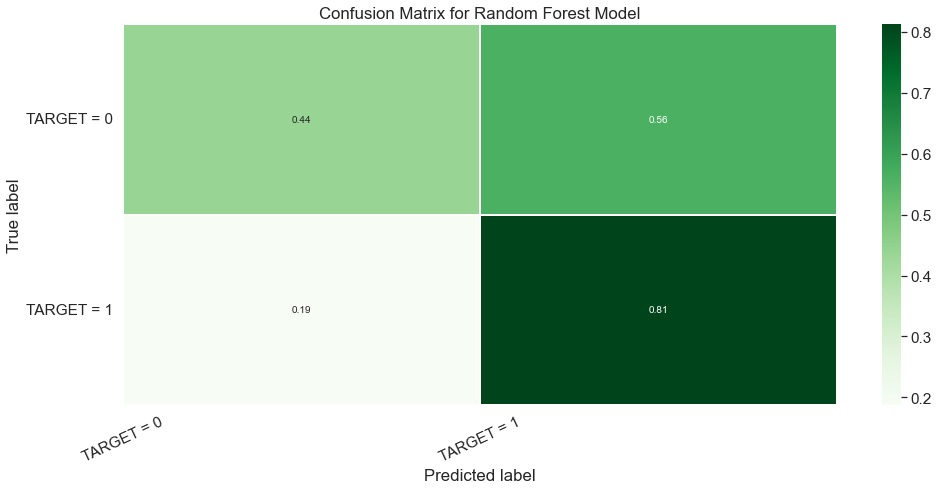

In [221]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test_resampled, yh_test > thresholds[youden])
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
pyplot.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=pyplot.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['TARGET = 0', 'TARGET = 1']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
pyplot.xticks(tick_marks, class_names, rotation=25)
pyplot.yticks(tick_marks2, class_names, rotation=0)
pyplot.xlabel('Predicted label')
pyplot.ylabel('True label')
pyplot.title('Confusion Matrix for Random Forest Model')
pyplot.show()

# Dropout : With Callbacks + Validation

Epoch 1/100
872/872 [==============================] - 3s 3ms/step - loss: 0.6039 - binary_accuracy: 0.6784 - precision_6: 0.5405 - recall_6: 0.2355 - auc_7: 0.6565 - val_loss: 0.9322 - val_binary_accuracy: 0.3366 - val_precision_6: 1.0000 - val_recall_6: 0.3366 - val_auc_7: 0.0000e+00
Epoch 2/100
872/872 [==============================] - 2s 2ms/step - loss: 0.5835 - binary_accuracy: 0.6935 - precision_6: 0.5788 - recall_6: 0.2952 - auc_7: 0.6948 - val_loss: 1.0241 - val_binary_accuracy: 0.3119 - val_precision_6: 1.0000 - val_recall_6: 0.3119 - val_auc_7: 0.0000e+00
Epoch 3/100
872/872 [==============================] - 2s 2ms/step - loss: 0.5780 - binary_accuracy: 0.6989 - precision_6: 0.5928 - recall_6: 0.3091 - auc_7: 0.7039 - val_loss: 1.0109 - val_binary_accuracy: 0.2913 - val_precision_6: 1.0000 - val_recall_6: 0.2913 - val_auc_7: 0.0000e+00
Epoch 4/100
872/872 [==============================] - 2s 2ms/step - loss: 0.5747 - binary_accuracy: 0.7009 - precision_6: 0.5992 - recall_

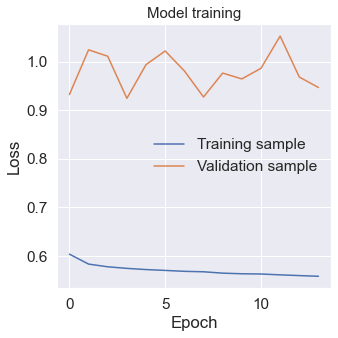

Best epoch: 3
389/389 [==============================] - 0s 1ms/step - loss: 0.6650 - binary_accuracy: 0.6109 - precision_6: 0.7491 - recall_6: 0.3334 - auc_7: 0.7101


In [222]:
# Resets model
model = build_model(input_shape=60)
model.compile(
    loss=losses.BinaryCrossentropy(),
    optimizer=optimizers.Adam(learning_rate=0.001), 
    metrics=[
        metrics.BinaryAccuracy(),
        metrics.Precision(),
        metrics.Recall(),
        metrics.AUC(), 
    ]
)

# Callbacks
train_callbacks = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
train_params.update(callbacks=train_callbacks)
del train_callbacks

# Training with validation
training = model.fit(
    X_train_resampled, y_train_resampled, 
    validation_split=0.25,
    **train_params)

# Displays history
display_history(training.history, validation=True)
print(f"Best epoch: {np.argmin(training.history['val_loss'])}")

# Generalisation performance
earlystop_stats = model.evaluate(X_test_resampled, y_test_resampled)

In [223]:
#the predictive performance on the train sample
a =  model.evaluate(X_train_resampled, y_train_resampled)
a = [round(x, 2) for x in a]

1163/1163 [==============================] - 1s 1ms/step - loss: 0.6563 - binary_accuracy: 0.6188 - precision_6: 0.7543 - recall_6: 0.3523 - auc_7: 0.7198


In [224]:
#the predictive performance on the train sample
b =  model.evaluate(X_test_resampled, y_test_resampled)
b = [round(x, 2) for x in b]

389/389 [==============================] - 1s 1ms/step - loss: 0.6650 - binary_accuracy: 0.6109 - precision_6: 0.7491 - recall_6: 0.3334 - auc_7: 0.7101


In [225]:
data = {'Metric': ['Binary Accuracy', 'Precision', 'Recall','ROC AUC'],
        'Training': [a[1], a[2], a[3], a[4]],
        'Test': [b[1], b[2], b[3], b[4]]}
df = pd.DataFrame(data)
df

,Metric,Training,Test
0,Binary Accuracy,0.62,0.61
1,Precision,0.75,0.75
2,Recall,0.35,0.33
3,ROC AUC,0.72,0.71


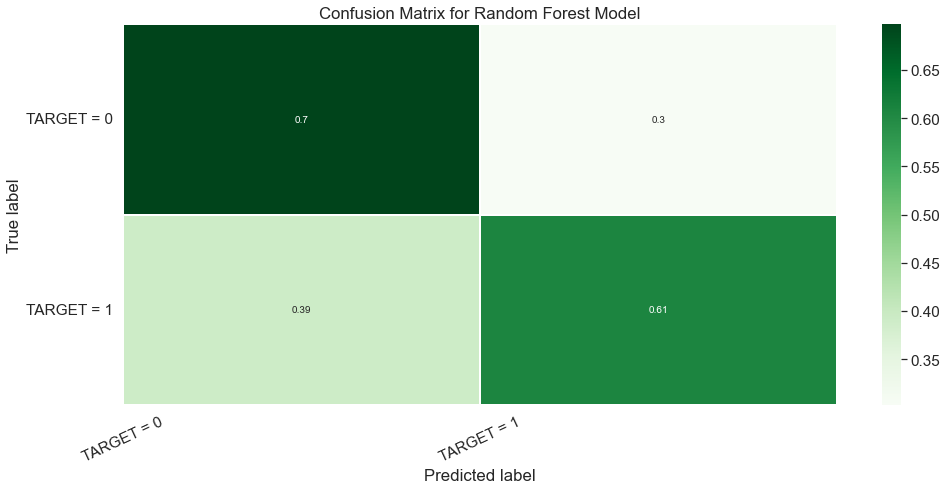

In [227]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test_resampled, yh_test > thresholds[youden])
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
pyplot.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=pyplot.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['TARGET = 0', 'TARGET = 1']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
pyplot.xticks(tick_marks, class_names, rotation=25)
pyplot.yticks(tick_marks2, class_names, rotation=0)
pyplot.xlabel('Predicted label')
pyplot.ylabel('True label')
pyplot.title('Confusion Matrix for Random Forest Model')
pyplot.show()

# Batch Normalization

In [248]:
# Model structure
def build_model(input_shape:int):
  initializer = initializers.HeNormal()
  inputs  = layers.Input(shape=(input_shape,), name='input_layer')
  hidden  = layers.Dense(units=32, activation='linear', kernel_initializer=initializer, name='hidden_layer1')(inputs)
  hidden  = layers.BatchNormalization(name='batchnorm_layer1')(hidden)
  hidden  = layers.Activation('relu', name='activation_layer1')(hidden) 
  hidden  = layers.Dense(units=32, activation='linear', kernel_initializer=initializer, name='hidden_layer2')(hidden)
  hidden  = layers.BatchNormalization(name='batchnorm_layer2')(hidden)
  hidden  = layers.Activation('relu', name='activation_layer2')(hidden) 
  outputs = layers.Dense(units=1,  activation='sigmoid', name='output_layer')(hidden)
  model   = models.Model(inputs=inputs, outputs=outputs, name='batchnorm_model')
  return model

# Without Callback

In [229]:
# Compiles model
model = build_model(input_shape=60)
model.compile(
    loss=losses.BinaryCrossentropy(),
    optimizer=optimizers.Adam(learning_rate=0.001), 
    metrics=[
        metrics.BinaryAccuracy(),
        metrics.Precision(),
        metrics.Recall(),
        metrics.AUC(), 
    ]
)

# Estimates model
train_params = dict(epochs=100, verbose=1)
training     = model.fit(X_train_resampled, y_train_resampled, **train_params)

Epoch 1/100
1163/1163 [==============================] - 4s 2ms/step - loss: 0.6454 - binary_accuracy: 0.6276 - precision_7: 0.6332 - recall_7: 0.6068 - auc_8: 0.6763
Epoch 2/100
1163/1163 [==============================] - 2s 2ms/step - loss: 0.6231 - binary_accuracy: 0.6529 - precision_7: 0.6528 - recall_7: 0.6529 - auc_8: 0.7104
Epoch 3/100
1163/1163 [==============================] - 3s 2ms/step - loss: 0.6185 - binary_accuracy: 0.6580 - precision_7: 0.6595 - recall_7: 0.6532 - auc_8: 0.7169
Epoch 4/100
1163/1163 [==============================] - 2s 2ms/step - loss: 0.6159 - binary_accuracy: 0.6599 - precision_7: 0.6585 - recall_7: 0.6643 - auc_8: 0.7200
Epoch 5/100
1163/1163 [==============================] - 2s 2ms/step - loss: 0.6147 - binary_accuracy: 0.6628 - precision_7: 0.6611 - recall_7: 0.6677 - auc_8: 0.7217
Epoch 6/100
1163/1163 [==============================] - 2s 2ms/step - loss: 0.6137 - binary_accuracy: 0.6635 - precision_7: 0.6627 - recall_7: 0.6658 - auc_8: 0.723

1163/1163 [==============================] - 2s 2ms/step - loss: 0.5840 - binary_accuracy: 0.6905 - precision_7: 0.6890 - recall_7: 0.6944 - auc_8: 0.7586
Epoch 50/100
1163/1163 [==============================] - 2s 2ms/step - loss: 0.5853 - binary_accuracy: 0.6911 - precision_7: 0.6888 - recall_7: 0.6971 - auc_8: 0.7571
Epoch 51/100
1163/1163 [==============================] - 2s 2ms/step - loss: 0.5841 - binary_accuracy: 0.6895 - precision_7: 0.6887 - recall_7: 0.6918 - auc_8: 0.7587
Epoch 52/100
1163/1163 [==============================] - 2s 2ms/step - loss: 0.5840 - binary_accuracy: 0.6905 - precision_7: 0.6894 - recall_7: 0.6934 - auc_8: 0.7583
Epoch 53/100
1163/1163 [==============================] - 3s 2ms/step - loss: 0.5828 - binary_accuracy: 0.6912 - precision_7: 0.6898 - recall_7: 0.6951 - auc_8: 0.7600
Epoch 54/100
1163/1163 [==============================] - 2s 2ms/step - loss: 0.5813 - binary_accuracy: 0.6944 - precision_7: 0.6935 - recall_7: 0.6969 - auc_8: 0.7615
Epoch

1163/1163 [==============================] - 2s 2ms/step - loss: 0.5757 - binary_accuracy: 0.6988 - precision_7: 0.6978 - recall_7: 0.7012 - auc_8: 0.7677
Epoch 98/100
1163/1163 [==============================] - 2s 2ms/step - loss: 0.5739 - binary_accuracy: 0.6985 - precision_7: 0.6972 - recall_7: 0.7019 - auc_8: 0.7690
Epoch 99/100
1163/1163 [==============================] - 2s 2ms/step - loss: 0.5759 - binary_accuracy: 0.6959 - precision_7: 0.6952 - recall_7: 0.6977 - auc_8: 0.7665
Epoch 100/100
1163/1163 [==============================] - 2s 2ms/step - loss: 0.5734 - binary_accuracy: 0.7002 - precision_7: 0.6993 - recall_7: 0.7024 - auc_8: 0.7694


In [231]:
#the predictive performance on the train sample
a =  model.evaluate(X_train_resampled, y_train_resampled)
a = [round(x, 2) for x in a]

1163/1163 [==============================] - 2s 1ms/step - loss: 0.5521 - binary_accuracy: 0.7173 - precision_7: 0.7228 - recall_7: 0.7051 - auc_8: 0.7916


In [232]:
#the predictive performance on the test sample
b =  model.evaluate(X_test_resampled, y_test_resampled)
b = [round(x, 2) for x in b]

389/389 [==============================] - 1s 1ms/step - loss: 0.6490 - binary_accuracy: 0.6429 - precision_7: 0.6490 - recall_7: 0.6224 - auc_8: 0.6928


In [233]:
data = {'Metric': ['Binary Accuracy', 'Precision', 'Recall','ROC AUC'],
        'Training': [a[1], a[2], a[3], a[4]],
        'Test': [b[1], b[2], b[3], b[4]]}
df = pd.DataFrame(data)
df

,Metric,Training,Test
0,Binary Accuracy,0.72,0.64
1,Precision,0.72,0.65
2,Recall,0.71,0.62
3,ROC AUC,0.79,0.69


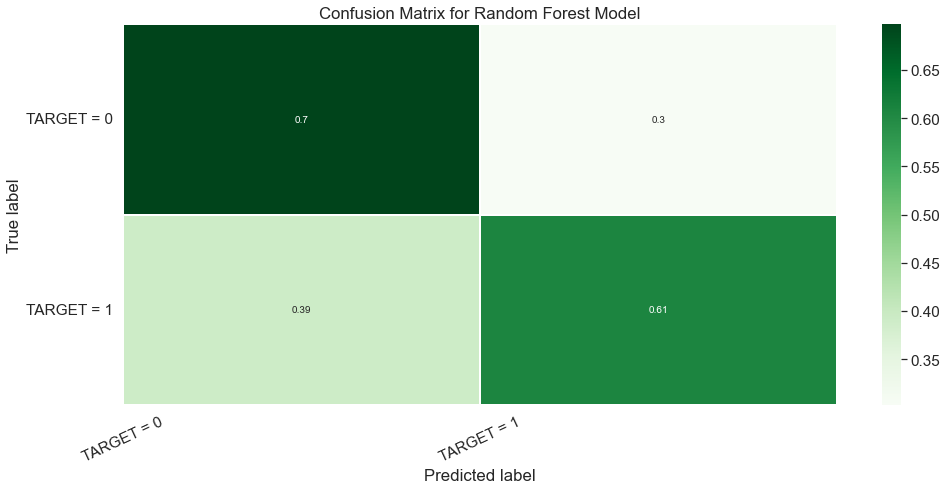

In [234]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test_resampled, yh_test > thresholds[youden])
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
pyplot.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=pyplot.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['TARGET = 0', 'TARGET = 1']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
pyplot.xticks(tick_marks, class_names, rotation=25)
pyplot.yticks(tick_marks2, class_names, rotation=0)
pyplot.xlabel('Predicted label')
pyplot.ylabel('True label')
pyplot.title('Confusion Matrix for Random Forest Model')
pyplot.show()

# With Callback

Epoch 1/100
872/872 [==============================] - 4s 3ms/step - loss: 0.6029 - binary_accuracy: 0.6785 - precision_8: 0.5326 - recall_8: 0.2887 - auc_9: 0.6640 - val_loss: 0.9940 - val_binary_accuracy: 0.3110 - val_precision_8: 1.0000 - val_recall_8: 0.3110 - val_auc_9: 0.0000e+00
Epoch 2/100
872/872 [==============================] - 2s 2ms/step - loss: 0.5798 - binary_accuracy: 0.6992 - precision_8: 0.5894 - recall_8: 0.3222 - auc_9: 0.7015 - val_loss: 0.9424 - val_binary_accuracy: 0.3720 - val_precision_8: 1.0000 - val_recall_8: 0.3720 - val_auc_9: 0.0000e+00
Epoch 3/100
872/872 [==============================] - 2s 3ms/step - loss: 0.5729 - binary_accuracy: 0.7039 - precision_8: 0.5953 - recall_8: 0.3486 - auc_9: 0.7122 - val_loss: 1.0204 - val_binary_accuracy: 0.3201 - val_precision_8: 1.0000 - val_recall_8: 0.3201 - val_auc_9: 0.0000e+00
Epoch 4/100
872/872 [==============================] - 2s 2ms/step - loss: 0.5705 - binary_accuracy: 0.7060 - precision_8: 0.6013 - recall_

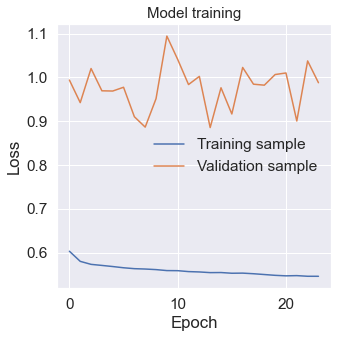

Best epoch: 13
389/389 [==============================] - 1s 2ms/step - loss: 0.6578 - binary_accuracy: 0.6291 - precision_8: 0.7248 - recall_8: 0.4164 - auc_9: 0.7095


In [235]:
# Resets model
model = build_model(input_shape=60)
model.compile(
    loss=losses.BinaryCrossentropy(),
    optimizer=optimizers.Adam(learning_rate=0.001), 
    metrics=[
        metrics.BinaryAccuracy(),
        metrics.Precision(),
        metrics.Recall(),
        metrics.AUC(), 
    ]
)

# Callbacks
train_callbacks = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
train_params.update(callbacks=train_callbacks)
del train_callbacks

# Training with validation
training = model.fit(
    X_train_resampled, y_train_resampled, 
    validation_split=0.25,
    **train_params)

# Displays history
display_history(training.history, validation=True)
print(f"Best epoch: {np.argmin(training.history['val_loss'])}")

# Generalisation performance
earlystop_stats = model.evaluate(X_test_resampled, y_test_resampled)

# Generalisation performance
batchnorm_stats = model.evaluate(X_test_resampled, y_test_resampled)

In [236]:
#the predictive performance on the train sample
a =  model.evaluate(X_train_resampled, y_train_resampled)
a = [round(x, 2) for x in a]

1163/1163 [==============================] - 2s 1ms/step - loss: 0.6289 - binary_accuracy: 0.6527 - precision_8: 0.7583 - recall_8: 0.4483 - auc_9: 0.7427


In [237]:
#the predictive performance on the test sample
b =  model.evaluate(X_test_resampled, y_test_resampled)
b = [round(x, 2) for x in b]

389/389 [==============================] - 1s 2ms/step - loss: 0.6578 - binary_accuracy: 0.6291 - precision_8: 0.7248 - recall_8: 0.4164 - auc_9: 0.7095


In [239]:
data = {'Metric': ['Binary Accuracy', 'Precision', 'Recall','ROC AUC'],
        'Training': [a[1], a[2], a[3], a[4]],
        'Test': [b[1], b[2], b[3], b[4]]}
df = pd.DataFrame(data)
df

,Metric,Training,Test
0,Binary Accuracy,0.65,0.63
1,Precision,0.76,0.72
2,Recall,0.45,0.42
3,ROC AUC,0.74,0.71


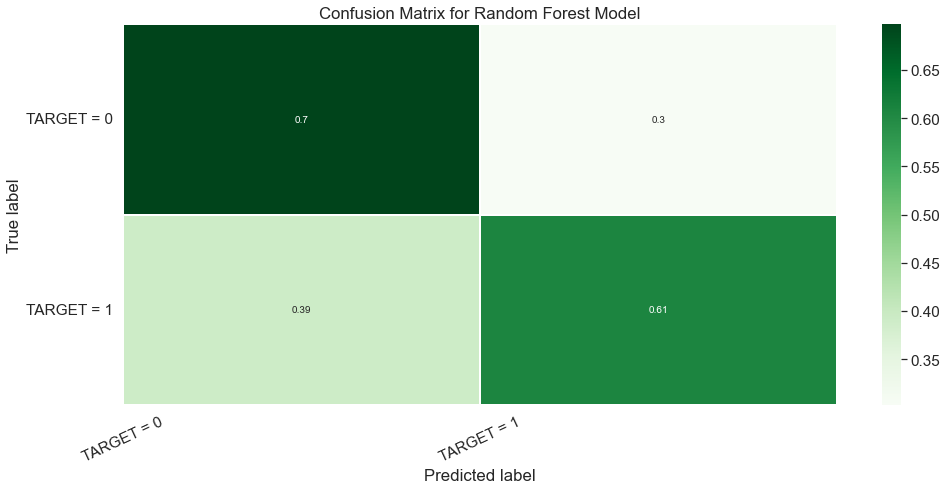

In [238]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test_resampled, yh_test > thresholds[youden])
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
pyplot.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=pyplot.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['TARGET = 0', 'TARGET = 1']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
pyplot.xticks(tick_marks, class_names, rotation=25)
pyplot.yticks(tick_marks2, class_names, rotation=0)
pyplot.xlabel('Predicted label')
pyplot.ylabel('True label')
pyplot.title('Confusion Matrix for Random Forest Model')
pyplot.show()